## Visualization

### matplotlib

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

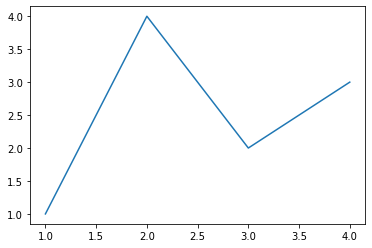

In [3]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

<img src="https://matplotlib.org/stable/_images/anatomy.png" alt="drawing" width="500"/>

<Figure size 432x288 with 0 Axes>

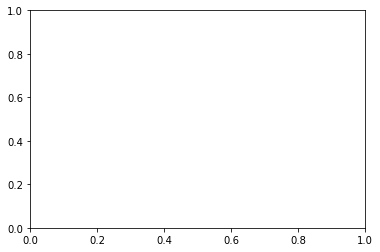

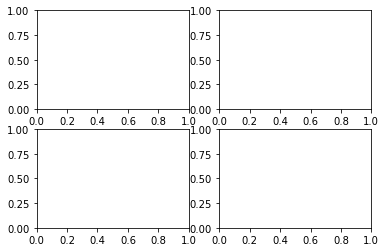

In [7]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

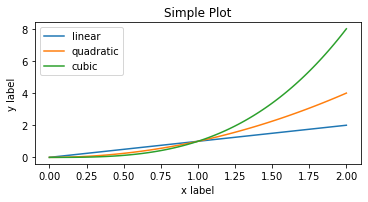

In [17]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

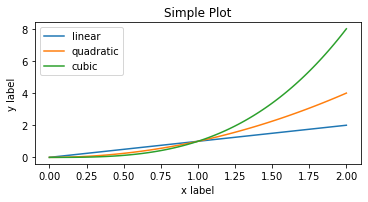

In [9]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

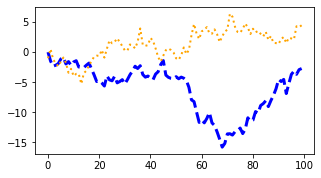

In [19]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

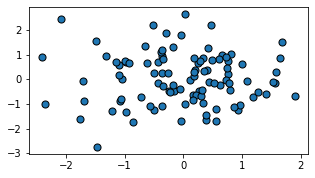

In [20]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

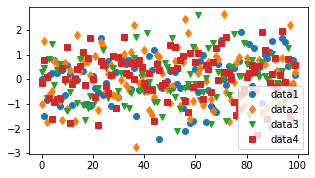

In [21]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

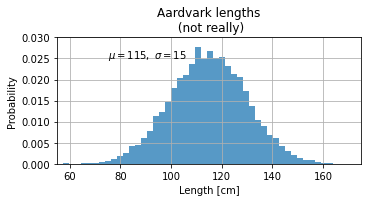

In [23]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

# You can also change the color and font size with the color and fontsize arguments
ax.set_xlabel('Length [cm]')
# ax.set_xlabel('Length [cm]', fontsize=14, color='red')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$') # LaTex can be used in text for math expressions !
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

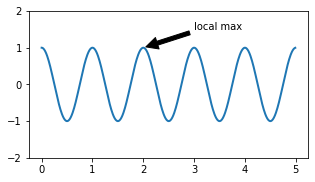

In [29]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

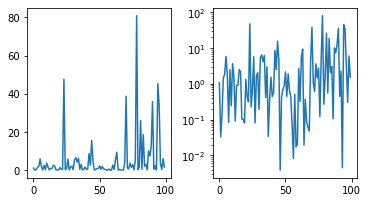

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

# log scaling 
axs[1].set_yscale('log')
axs[1].plot(xdata, data);

### More ?

https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

### Link with pandas

#### Converting data to numpy arrays

In [5]:
import pandas as pd

data = pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})
data

,Yes,No
0,50,131
1,21,2


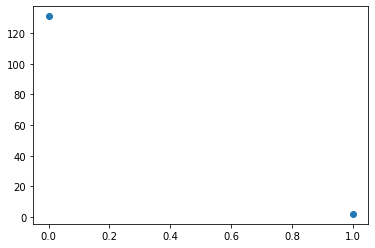

In [53]:
fig, ax = plt.subplots()
ax.scatter(data.index.values, data['No'].values);

#### The plot method of pandas Series and Dataframe

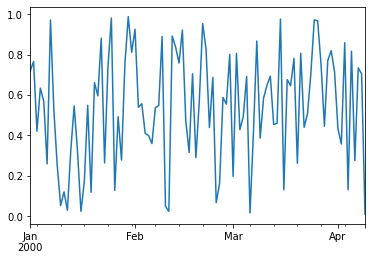

In [83]:
ts = pd.Series(np.random.rand(100), index=pd.date_range('1/1/2000', periods=100))

ts.plot();

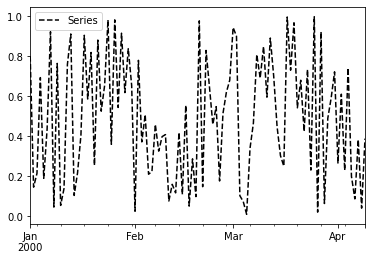

In [78]:
plt.figure(); ts.plot(style='k--', label='Series'); plt.legend();

<Figure size 432x288 with 0 Axes>

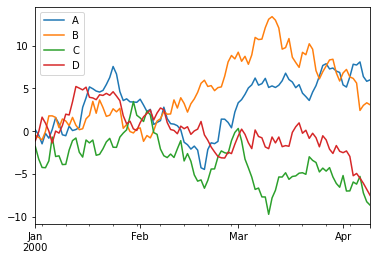

In [92]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best');

<Figure size 432x288 with 0 Axes>

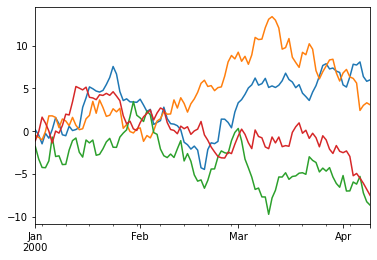

In [93]:
plt.figure(); df.plot(legend=False);

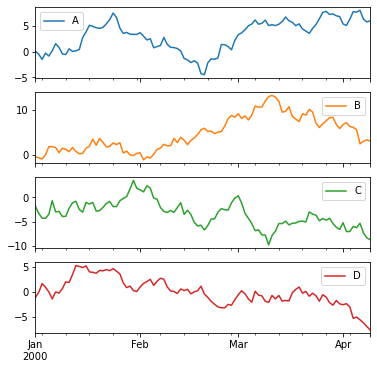

In [94]:
df.plot(subplots=True, figsize=(6, 6)); plt.legend(loc='best')

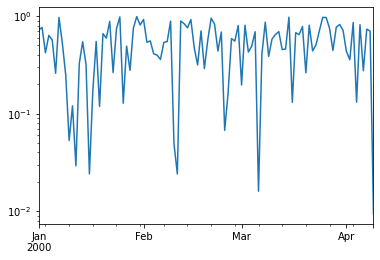

In [96]:
plt.figure(); ts.plot(logy=True);

### More ?

https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html

### Seaborn

In [81]:
import seaborn as sns

wine_reviews = pd.read_csv("winemag-data-130k-v2.csv", index_col=0).dropna(subset=['country'])
climate_data = pd.read_csv("climate.csv", index_col="date", parse_dates=True)
climate_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [24]:
climate_data.tail()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-04-20,34.500,27.500000,5.562500,998.625000
2017-04-21,34.250,39.375000,6.962500,999.875000
2017-04-22,32.900,40.900000,8.890000,1001.600000
2017-04-23,32.875,27.500000,9.962500,1002.125000
2017-04-24,32.000,27.142857,12.157143,1004.142857


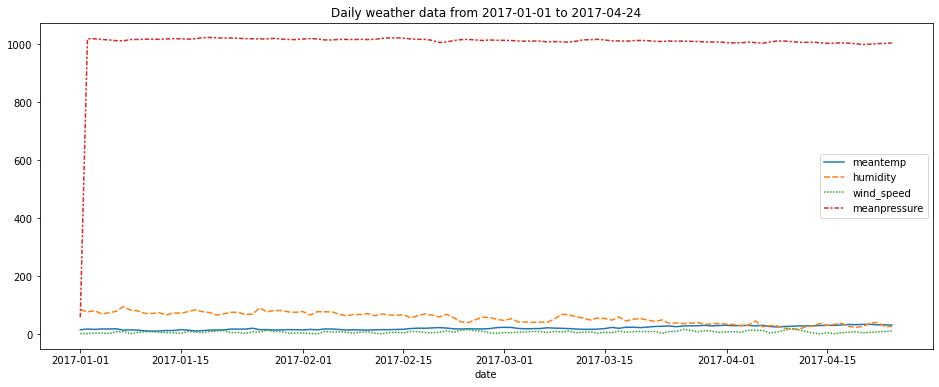

In [30]:
# Set the figure with matplotlib, and set width and height with "figsize"
plt.figure(figsize=(16,6))

# Add title
plt.title("Daily weather data from 2017-01-01 to 2017-04-24")

sns.lineplot(data=climate_data);

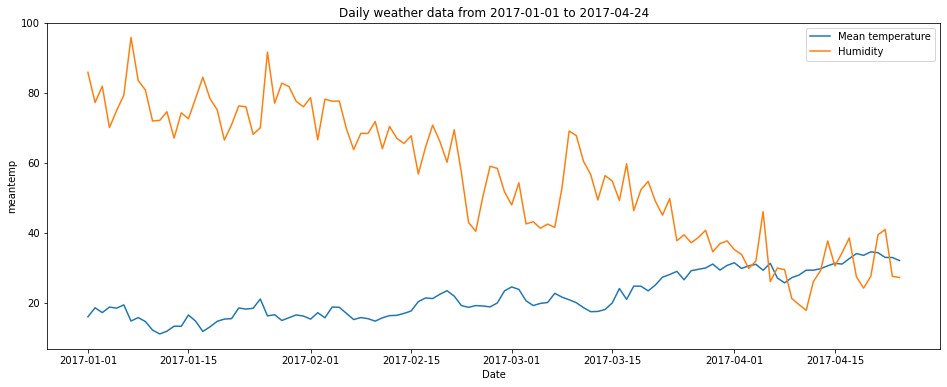

In [31]:
plt.figure(figsize=(16,6))

plt.title("Daily weather data from 2017-01-01 to 2017-04-24")

sns.lineplot(data=climate_data.meantemp, label="Mean temperature")

sns.lineplot(data=climate_data.humidity, label="Humidity")

plt.xlabel("Date");

In [33]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
serial,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


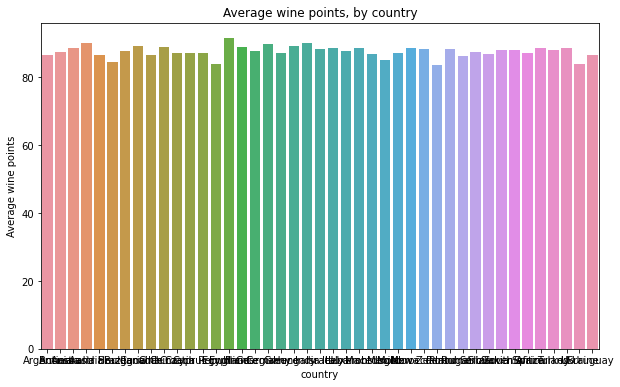

In [108]:
mean_points_by_country = wine_reviews.sort_values(by='country').groupby('country').points.mean()

plt.figure(figsize=(10,6))

plt.title("Average wine points, by country")

# Bar chart showing average wine points by country
sns.barplot(x=mean_points_by_country.index, y=mean_points_by_country)

# Add label for vertical axis
plt.ylabel("Average wine points");
# plt.xticks(rotation=90);

In [117]:
flight_data = pd.read_csv("flight_delays.csv", index_col="Month")
flight_data

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


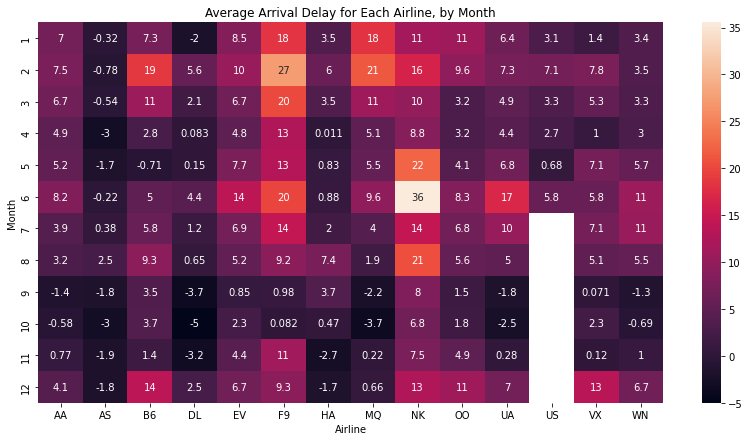

In [119]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline");

In [129]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


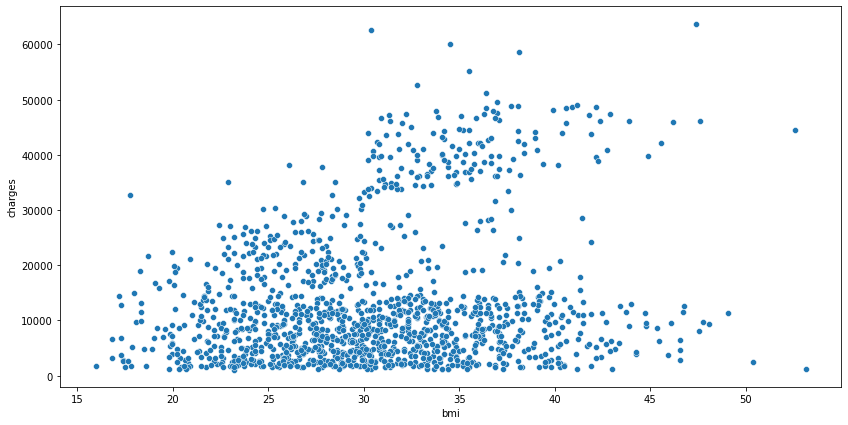

In [134]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges']);

<AxesSubplot:xlabel='bmi', ylabel='charges'>

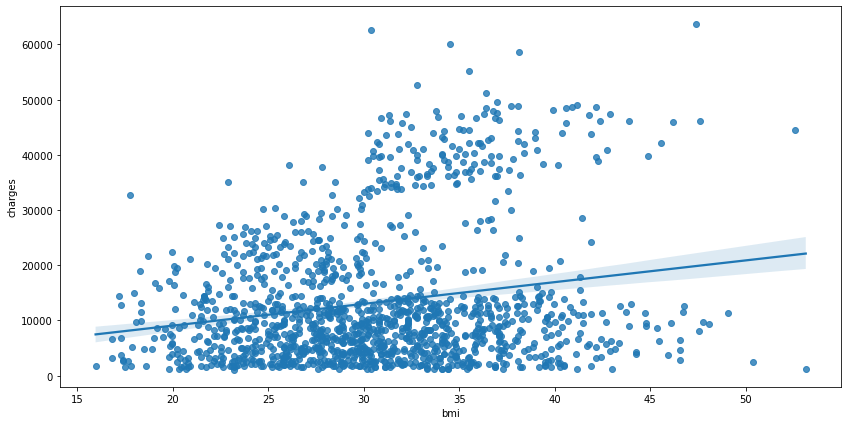

In [131]:
plt.figure(figsize=(14,7))
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges']);

<AxesSubplot:xlabel='bmi', ylabel='charges'>

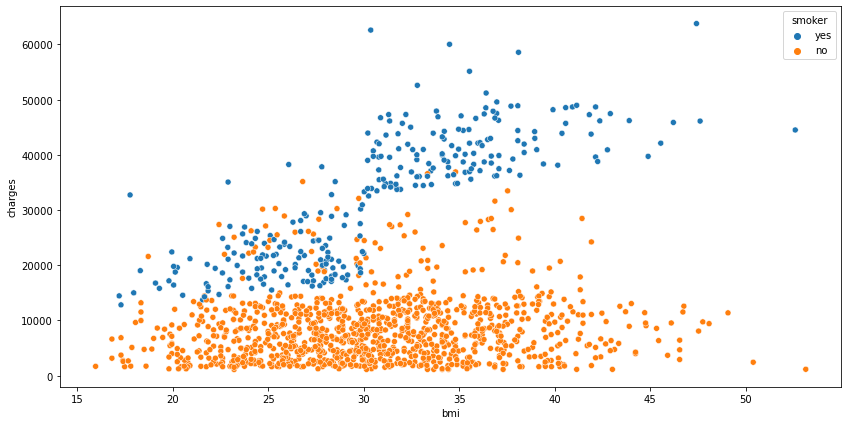

In [132]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker']);

<Figure size 1008x504 with 0 Axes>

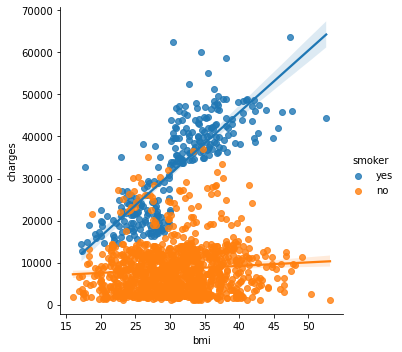

In [135]:
plt.figure(figsize=(14,7))
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data);

In [137]:
iris_data = pd.read_csv("iris.csv", index_col="Id")
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


<Figure size 864x360 with 0 Axes>

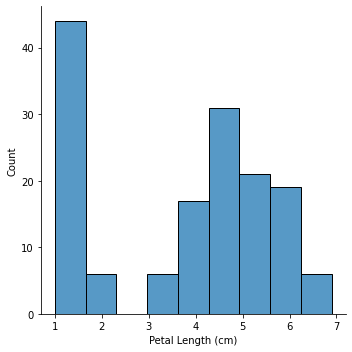

In [147]:
plt.figure(figsize=(12,5))
sns.displot(data=iris_data['Petal Length (cm)'], kde=False);

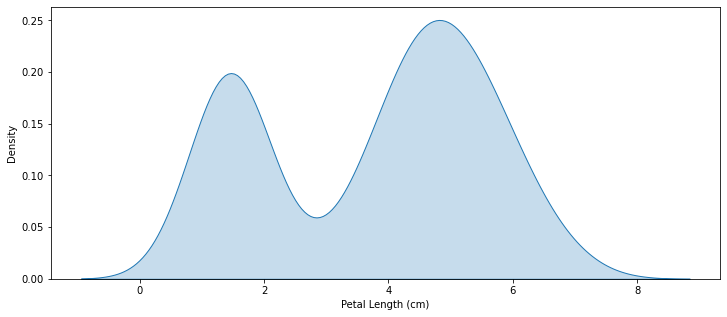

In [146]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True);

<Figure size 864x360 with 0 Axes>

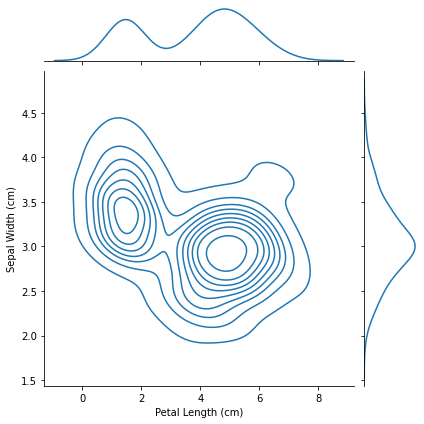

In [149]:
plt.figure(figsize=(12,5))
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde");

In [151]:
iris_set_data = pd.read_csv("iris_setosa.csv", index_col="Id")
iris_ver_data = pd.read_csv("iris_versicolor.csv", index_col="Id")
iris_vir_data = pd.read_csv("iris_virginica.csv", index_col="Id")

iris_ver_data.head()

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

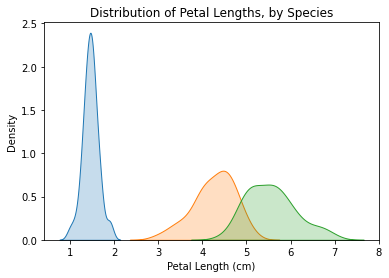

In [154]:
# KDE plots for each species
sns.kdeplot(data=iris_set_data['Petal Length (cm)'], label="Iris-setosa", shade=True)
sns.kdeplot(data=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", shade=True)
sns.kdeplot(data=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")